# Sales Exercise

In this exercise, you will perform a simulated auditing task with data on invoices, customer orders, and shipments.

## Overview and setting

Imagine you are asked to work on a new audit client that distributes bath bombs and cowbells (my daughter’s favorite toys at the time I created this exercise). Your manager has provided you with 3 related datasets containing invoice, customer order, and shipment information. Your task is to explore the data and identify observations that require further testing.

## Housekeeping

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import datasets

In the working folder, you will find three datasets: [invoices](invoices.csv), [customer orders](customer_orders.txt), and [shipping data](shipping_data.csv). A description of these datasets can be found in the [sales data sheet](sales_data_sheet.pdf). The datasets are in csv or txt format and can be read into Python using the `pd.read_csv()` function.

In [115]:
invoices = pd.read_csv('invoices.csv')
customer_orders = pd.read_csv('customer_orders.txt', sep='\t')
shipping_data = pd.read_csv('shipping_data.csv')

## Inspect and clean each dataset

After reviewing the [sales data sheet](sales_data_sheet.pdf), inspect each dataset carefully. Think about your “strategy” for wrangling each dataset. Consider how each dataset needs to be cleaned, formatted, or reshaped.

### Clean and process the `invoices` dataset:

In [116]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149256 entries, 0 to 149255
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   invoice_date    149256 non-null  object 
 1   customer_id     149256 non-null  object 
 2   invoice_num     149256 non-null  float64
 3   invoice_amount  149256 non-null  int64  
 4   terms           149256 non-null  object 
 5   customer_order  149256 non-null  object 
 6   item            149256 non-null  object 
 7   amount          149256 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 9.1+ MB


In [117]:
invoices.head()

,invoice_date,customer_id,invoice_num,invoice_amount,terms,customer_order,item,amount
0,12/31/2024,m,400264.0,225,Shipping Point,YGJW5MM2QJSJ,cowbells,11
1,12/31/2024,m,400264.0,225,Shipping Point,YGJW5MM2QJSJ,bathbombs,23
2,12/31/2024,c,400263.0,210,Shipping Point,CP8IK60HEX58,cowbells,11
3,12/31/2024,c,400263.0,210,Shipping Point,CP8IK60HEX58,bathbombs,20
4,12/31/2024,i,400262.0,265,Shipping Point,PWUX3ZRDDTDV,cowbells,17


Notice there are 'duplicate' invoice numbers. This is because each invoice can contain multiple items (i.e., bath bombs and cowbells). We will need to pivot this data from long to wide format so that each invoice number is unique and cowbells and bath bombs are in separate columns.

In [118]:
invoices_clean = invoices.pivot(
    index=['invoice_date', 'customer_id', 'invoice_num', 'invoice_amount', 'terms', 'customer_order'],
    columns='item',
    values='amount'
).reset_index()

invoices_clean.head()

item,invoice_date,customer_id,invoice_num,invoice_amount,terms,customer_order,bathbombs,cowbells
0,1/1/2024,a,324887.0,195,Destination,HDGSSQTNOS7R,21,9
1,1/1/2024,a,324897.0,245,Shipping Point,F0S0TV6ZAVHI,23,13
2,1/1/2024,a,324899.0,190,Destination,1BLX3068Q804,20,9
3,1/1/2024,a,324902.0,100,Shipping Point,591AO6KQM3L8,12,4
4,1/1/2024,a,324905.0,335,Shipping Point,RLAW1T8NYPPQ,21,23


Everything looks pretty good. However, notice that the `invoice_date` is in string format. Let's convert it to a date format.

In [119]:
invoices_clean['invoice_date'] = pd.to_datetime(invoices_clean['invoice_date'], format='%m/%d/%Y')

invoices_clean.head()

item,invoice_date,customer_id,invoice_num,invoice_amount,terms,customer_order,bathbombs,cowbells
0,2024-01-01,a,324887.0,195,Destination,HDGSSQTNOS7R,21,9
1,2024-01-01,a,324897.0,245,Shipping Point,F0S0TV6ZAVHI,23,13
2,2024-01-01,a,324899.0,190,Destination,1BLX3068Q804,20,9
3,2024-01-01,a,324902.0,100,Shipping Point,591AO6KQM3L8,12,4
4,2024-01-01,a,324905.0,335,Shipping Point,RLAW1T8NYPPQ,21,23


### Clean and process the `customer_orders` dataset:

In [120]:
customer_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75382 entries, 0 to 75381
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   customer_order       75382 non-null  object
 1   customer_order_date  75382 non-null  object
 2   cbls                 75382 non-null  int64 
 3   btbms                75382 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [121]:
customer_orders.head()

,customer_order,customer_order_date,cbls,btbms
0,YGJW5MM2QJSJ,2024-12-29,11,23
1,CP8IK60HEX58,2024-12-27,11,20
2,PWUX3ZRDDTDV,2024-12-28,17,19
3,KS5J92KQ0YWA,2024-12-30,13,33
4,A1Y2FJL3FLRV,2024-12-29,15,25


Everything looks pretty good here. However, notice that the `customer_order_date` is in string format. Let's convert it to a date format.

In [122]:
customer_orders_clean = customer_orders.copy()

customer_orders_clean['customer_order_date'] = pd.to_datetime(customer_orders_clean['customer_order_date'], format='%Y-%m-%d')

customer_orders_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75382 entries, 0 to 75381
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_order       75382 non-null  object        
 1   customer_order_date  75382 non-null  datetime64[ns]
 2   cbls                 75382 non-null  int64         
 3   btbms                75382 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


### Clean and process the `shipping_data` dataset:

In [123]:
shipping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73121 entries, 0 to 73120
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   shipping_date        73121 non-null  object 
 1   delivery_date        73121 non-null  object 
 2   shipping_num         73121 non-null  object 
 3   customer_id_invoice  73121 non-null  object 
 4   shipping_weight      73121 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.8+ MB


In [124]:
shipping_data.head()

,shipping_date,delivery_date,shipping_num,customer_id_invoice,shipping_weight
0,11/6/2024,11/10/2024,qf0sNp7fZLK0u,a - 381754,30.086839
1,11/4/2024,11/9/2024,xk5FJ4OB03hdG,k - 381315,22.179462
2,7/31/2024,8/4/2024,v1q7ZKWtOxDcc,c - 361184,36.817786
3,9/30/2024,10/3/2024,J2e827rAoFy1R,m - 373908,39.045741
4,2/27/2024,3/3/2024,stVnrLgEV8bdD,e - 332705,15.699900


This dataset needs a bit more work. Notice that the `customer_id` and `invoice_num` are combined in one column. We will need to split this into two separate columns. Also, the `shipping_date` and `delivery_date` are in string format. Let's convert these to date format.

In [125]:
shipping_data_clean = shipping_data.copy()

shipping_data_clean[['customer_id', 'invoice_num']] = shipping_data_clean['customer_id_invoice'].str.split(' - ', expand=True)

shipping_data_clean['shipping_date'] = pd.to_datetime(shipping_data_clean['shipping_date'], format='%m/%d/%Y')
shipping_data_clean['delivery_date'] = pd.to_datetime(shipping_data_clean['delivery_date'], format='%m/%d/%Y')

shipping_data_clean.head()

,shipping_date,delivery_date,shipping_num,customer_id_invoice,shipping_weight,customer_id,invoice_num
0,2024-11-06,2024-11-10,qf0sNp7fZLK0u,a - 381754,30.086839,a,381754
1,2024-11-04,2024-11-09,xk5FJ4OB03hdG,k - 381315,22.179462,k,381315
2,2024-07-31,2024-08-04,v1q7ZKWtOxDcc,c - 361184,36.817786,c,361184
3,2024-09-30,2024-10-03,J2e827rAoFy1R,m - 373908,39.045741,m,373908
4,2024-02-27,2024-03-03,stVnrLgEV8bdD,e - 332705,15.699900,e,332705


OK, we are very close, but notice that `invoice_num` is in string format. Let's convert it to numeric format.

In [126]:
shipping_data_clean['invoice_num'] = pd.to_numeric(shipping_data_clean['invoice_num'])

shipping_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73121 entries, 0 to 73120
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   shipping_date        73121 non-null  datetime64[ns]
 1   delivery_date        73121 non-null  datetime64[ns]
 2   shipping_num         73121 non-null  object        
 3   customer_id_invoice  73121 non-null  object        
 4   shipping_weight      73121 non-null  float64       
 5   customer_id          73121 non-null  object        
 6   invoice_num          73121 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 3.9+ MB


## Join and filter the sales datasets

Use join functions to create a list of invoices that **did not** have an associated shipment (save in a new dataset called `non_shipped_invoices`):

In [127]:
non_shipped_invoices = invoices_clean.merge(
    shipping_data_clean,
    on='invoice_num',
    how='left',
    indicator=True
).query('_merge == "left_only"').drop(columns=['_merge'])

non_shipped_invoices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 23 to 74624
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   invoice_date         2238 non-null   datetime64[ns]
 1   customer_id_x        2238 non-null   object        
 2   invoice_num          2238 non-null   float64       
 3   invoice_amount       2238 non-null   int64         
 4   terms                2238 non-null   object        
 5   customer_order       2238 non-null   object        
 6   bathbombs            2238 non-null   int64         
 7   cowbells             2238 non-null   int64         
 8   shipping_date        0 non-null      datetime64[ns]
 9   delivery_date        0 non-null      datetime64[ns]
 10  shipping_num         0 non-null      object        
 11  customer_id_invoice  0 non-null      object        
 12  shipping_weight      0 non-null      float64       
 13  customer_id_y        0 non-null     

Next, use join functions to combine all three datasets to form a new dataset called `complete_sales_data`. Make sure this dataset retains only observations that match across all three datasets:

In [128]:
# Inner join invoices_data_clean with customer_orders_data_clean on 'customer_order'
complete_sales_data = pd.merge(
    invoices_clean,
    customer_orders_clean,
    on='customer_order',
    how='inner',
    validate='one_to_one'
)

# Inner join the result with shipping_data_clean on 'invoice_num'
complete_sales_data = pd.merge(
    complete_sales_data,
    shipping_data_clean,
    on='invoice_num',
    how='inner',
    validate='one_to_one'
)

complete_sales_data.head()

,invoice_date,customer_id_x,invoice_num,invoice_amount,terms,customer_order,bathbombs,cowbells,customer_order_date,cbls,btbms,shipping_date,delivery_date,shipping_num,customer_id_invoice,shipping_weight,customer_id_y
0,2024-01-01,a,324887.0,195,Destination,HDGSSQTNOS7R,21,9,2023-12-31,9,21,2024-01-02,2024-01-06,jYzUwIZYMuUas,a - 324887,29.027389,a
1,2024-01-01,a,324897.0,245,Shipping Point,F0S0TV6ZAVHI,23,13,2023-12-30,13,23,2023-12-31,2024-01-04,bYl5jC7Hzwlpb,a - 324897,40.015447,a
2,2024-01-01,a,324899.0,190,Destination,1BLX3068Q804,20,9,2023-12-31,9,20,2024-01-03,2024-01-08,neZWPo7GJsaZA,a - 324899,29.017023,a
3,2024-01-01,a,324902.0,100,Shipping Point,591AO6KQM3L8,12,4,2023-12-28,4,12,2024-01-01,2024-01-05,ZhYopgsOvrmlW,a - 324902,14.672825,a
4,2024-01-01,a,324905.0,335,Shipping Point,RLAW1T8NYPPQ,21,23,2023-12-30,23,21,2024-01-01,2024-01-04,ozIQUskfp8Nd7,a - 324905,54.552342,a


Notice that customer_id appears twice with different suffixes (i.e., _x and _y). This is because customer_id appears in both the invoices and shipping datasets.

Using the dataset created above, can you isolate the invoices that may have been recorded in the wrong year? Hint: Look at the shipping dates and shipping terms. Save in a new dataset called `wrong_period_sales`:

In [129]:
wrong_period_sales = complete_sales_data[
    ((complete_sales_data['terms'] == 'Destination') & (complete_sales_data['delivery_date'].dt.year != 2024)) |
    ((complete_sales_data['terms'] == 'Shipping Point') & (complete_sales_data['shipping_date'].dt.year != 2024))
]

wrong_period_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 1 to 27380
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   invoice_date         595 non-null    datetime64[ns]
 1   customer_id_x        595 non-null    object        
 2   invoice_num          595 non-null    float64       
 3   invoice_amount       595 non-null    int64         
 4   terms                595 non-null    object        
 5   customer_order       595 non-null    object        
 6   bathbombs            595 non-null    int64         
 7   cowbells             595 non-null    int64         
 8   customer_order_date  595 non-null    datetime64[ns]
 9   cbls                 595 non-null    int64         
 10  btbms                595 non-null    int64         
 11  shipping_date        595 non-null    datetime64[ns]
 12  delivery_date        595 non-null    datetime64[ns]
 13  shipping_num         595 non-null    o

In [130]:
wrong_period_sales.head()

,invoice_date,customer_id_x,invoice_num,invoice_amount,terms,customer_order,bathbombs,cowbells,customer_order_date,cbls,btbms,shipping_date,delivery_date,shipping_num,customer_id_invoice,shipping_weight,customer_id_y
1,2024-01-01,a,324897.0,245,Shipping Point,F0S0TV6ZAVHI,23,13,2023-12-30,13,23,2023-12-31,2024-01-04,bYl5jC7Hzwlpb,a - 324897,40.015447,a
7,2024-01-01,a,324915.0,185,Shipping Point,L2ZO6USFYD1W,17,10,2023-12-28,10,17,2023-12-31,2024-01-02,0oollpANKvLVf,a - 324915,33.454898,a
9,2024-01-01,a,324933.0,220,Shipping Point,3CNQVUWIQOYB,12,16,2023-12-29,16,12,2023-12-31,2024-01-04,Ms31XZOBXNYGv,a - 324933,25.565048,a
15,2024-01-01,b,325001.0,165,Shipping Point,00UG75SPAN6B,15,9,2023-12-29,9,15,2023-12-31,2024-01-03,loqH1hou4kgil,b - 325001,25.920859,b
17,2024-01-01,b,325010.0,215,Shipping Point,849IF9E9T7E2,19,12,2023-12-29,12,19,2023-12-31,2024-01-05,2IP5epZEmzHWX,b - 325010,35.436081,b


Create a variable in complete_sales_data called `inv_month` that represents the month of the invoice date:

In [131]:
complete_sales_data['inv_month'] = complete_sales_data['invoice_date'].dt.month

Create a summary of the total value of all invoices (`invoice_amount`) for each month (`inv_month`) during 2024. Store in `sales_per_month`:

In [132]:
sales_per_month = (
    complete_sales_data.groupby('inv_month', as_index=False)
    .agg(total_sales=('invoice_amount', 'sum'))
)

sales_per_month.head(12)

,inv_month,total_sales
0,1,819550
1,2,723090
2,3,787205
3,4,1152060
4,5,1231530
5,6,1167420
6,7,1195725
7,8,1243855
8,9,1072185
9,10,1235580


## Generate visualizations
Use a line chart to visualize trends in monthly sales using `sales_per_month`. Use a line chart to visualize trends in monthly sales using `sales_per_month`:

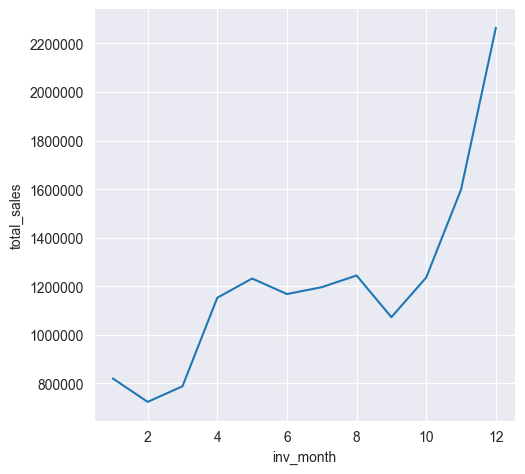

In [133]:
# Create the line plot using Seaborn
sns.relplot(
    data=sales_per_month,
    x='inv_month',
    y='total_sales',
    kind='line'
)

plt.ticklabel_format(style='plain', axis='y')

plt.show()

Use a scatterplot to visualize the relation between shipping weight and invoice amount - use techniques to avoid “overplotting”:

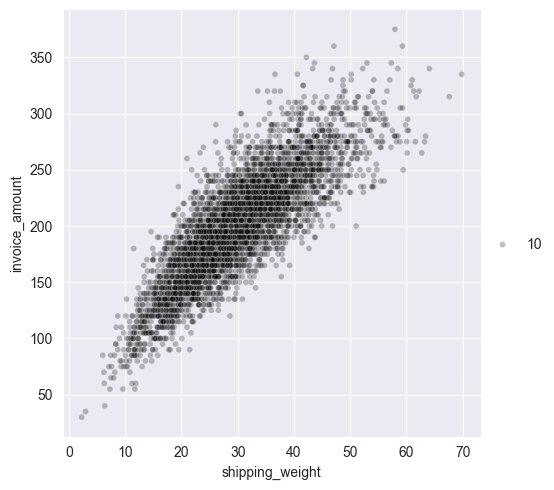

In [134]:
sns.relplot(
    data=complete_sales_data.sample(n=4000, random_state=42),
    x='shipping_weight',
    y='invoice_amount',
    color='black',
    alpha=0.25,
    size=10,
    kind='scatter'
)

plt.show()